# Feedback del modelamiento

- Mejorar la performance de nuestros modelos no solo pasa por optimizar sus parametros.
- Una de las partes clave, y según algunos expertos la más importante, es la de **diseñar la representación en la que se entregan los datos a los modelos** para que estos los procesen.
- Esto equivale, en palabras más simples, en definir de forma inteligente las features (columnas) de nuestras tablas de datos.

**Ejemplo de feature engineering:**

*El problema*:
    
Supongamos que estamos tratando de resolver el problema siguiente.

- Tenemos un problema de reconocer si ciertos datos con una sola feature son de una clase 1 o de una clase 2 (por ejemplo "el producto esta deficiente" o "el producto esta funcional").
- Por lo tanto estamos resolviendo una **clasificación**.
- Para esta clasificación decidimos tomar un SVM, que es un modelo poderoso que funciona buscando la "mejor" recta que separa los puntos de cada clase.

<img src="img/classif_1_feature.png">

*Como podemos ver no existe un separador óptimo. Debemos para resolver el problema buscar un modelo aún más poderoso? No necesariamente.*

**Agregemos una nueva feature: $$X[columna_2] = X[columna_1]^2$$**

<img src="img/classif_2_features.png">

*Claramente con esta nueva feature vemos que existe una recta que separa los espacios de puntos. <br>
Esta recta tendra un score ampliamente mejor que cualquier solucion al primer problema.*

Diseñar tus features es un arte más que una ciencia
- **Features Informativas:** 
    - Tus features son más utiles mientras más correlación tengan tu variable objetivo.
- **Features Independientes:**
    - Para no tener redudancias tus features deberían ser lo más independientes posible entre ellas.
- **Cantidad de Features controlada:**
    - Nuestra intuición nos falla en dimensiones superiores a 3 (ver video maldicion de la dimensionalidad). En la mayoría de los casos aumentar la cantidad de features afecta negativamente la performance si no contamos con una gran cantidad de datos. Por ultimo pocas features aseguran una mejor interpretabilidad de los modelos

**La maldición de la dimensión**

- En dimensión superior o igual a 4, nuestra capacidad de entender los datos se pierde y aún peor, fenomenos extraños/contraproducentes ocurren

- En alta dimensión es muy poco probable que tus ejemplos cubran todo el espacio de forma densa.
Por ende en **alta dimensión necesitas una cantidad de datos que crece exponencialmente para poder entrenar tus modelos**.
Te recomendamos tener cuidado al aumentar la dimensión de tus datos, no esta prohibido, pero hacerlo de forma exagerada te puede llevar hacia estos problemas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X = pd.read_csv('X_movies').drop('worldwide_gross', axis = 1)
X.head()

,production_budget,title_year,aspect_ratio,duration.1,budget,imdb_score,facebook_likes
0,425000000.0,2009.000000,1.780000,178.000000,2.370000e+08,7.9,4834.0
1,306000000.0,2002.130733,2.126976,108.577186,4.045539e+07,7.1,143.0
2,300000000.0,2007.000000,2.350000,169.000000,3.000000e+08,7.1,48350.0
3,300000000.0,2015.000000,2.350000,148.000000,2.450000e+08,6.8,11700.0
4,275000000.0,2012.000000,2.350000,164.000000,2.500000e+08,8.5,106759.0


In [4]:
import seaborn as sns

### .corr()
Para saber si nuestros features son independientes entre ellas

In [8]:
X.corr()

,production_budget,title_year,aspect_ratio,duration.1,budget,imdb_score,facebook_likes
production_budget,1.000000,0.207884,0.077459,0.276407,0.185357,0.033154,0.236820
title_year,0.207884,1.000000,0.130532,-0.137662,0.048664,-0.178685,0.124693
aspect_ratio,0.077459,0.130532,1.000000,-0.012645,0.011340,0.037765,0.020656
duration.1,0.276407,-0.137662,-0.012645,1.000000,0.064252,0.315642,0.121918
budget,0.185357,0.048664,0.011340,0.064252,1.000000,0.019417,0.032591
imdb_score,0.033154,-0.178685,0.037765,0.315642,0.019417,1.000000,0.096663
facebook_likes,0.236820,0.124693,0.020656,0.121918,0.032591,0.096663,1.000000


### sns.heatmap()

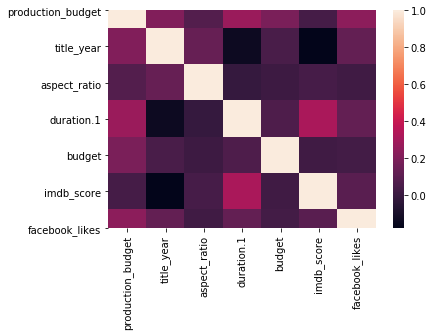

In [9]:
sns.heatmap(X.corr())

# Análisis exploratorio

In [10]:
X = pd.read_csv('X_movies')

In [11]:
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis = 1)

In [12]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
model = Lasso()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5478803815273083

### .coef_
Nos da los coeficentes que multiplicaran a cada valor de las variables

In [15]:
model.coef_

array([ 3.19036615e+00, -2.68763710e+05, -5.20895661e+06, -8.48926776e+04,
       -5.24650574e-02,  2.82115841e+07,  2.52357079e+02])

In [16]:
var = np.floor(np.log10(np.abs(model.coef_)))
var

array([ 0.,  5.,  6.,  4., -2.,  7.,  2.])

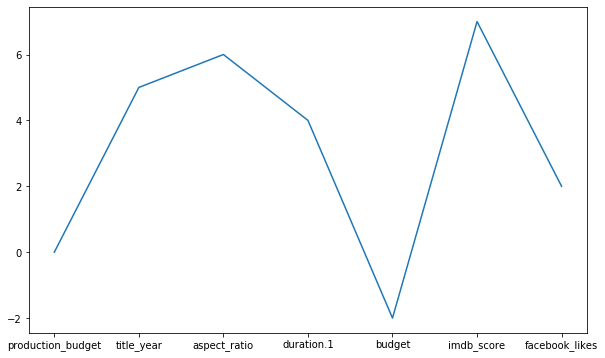

In [17]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));

### Correlación entre variables

### sns.pairplot()

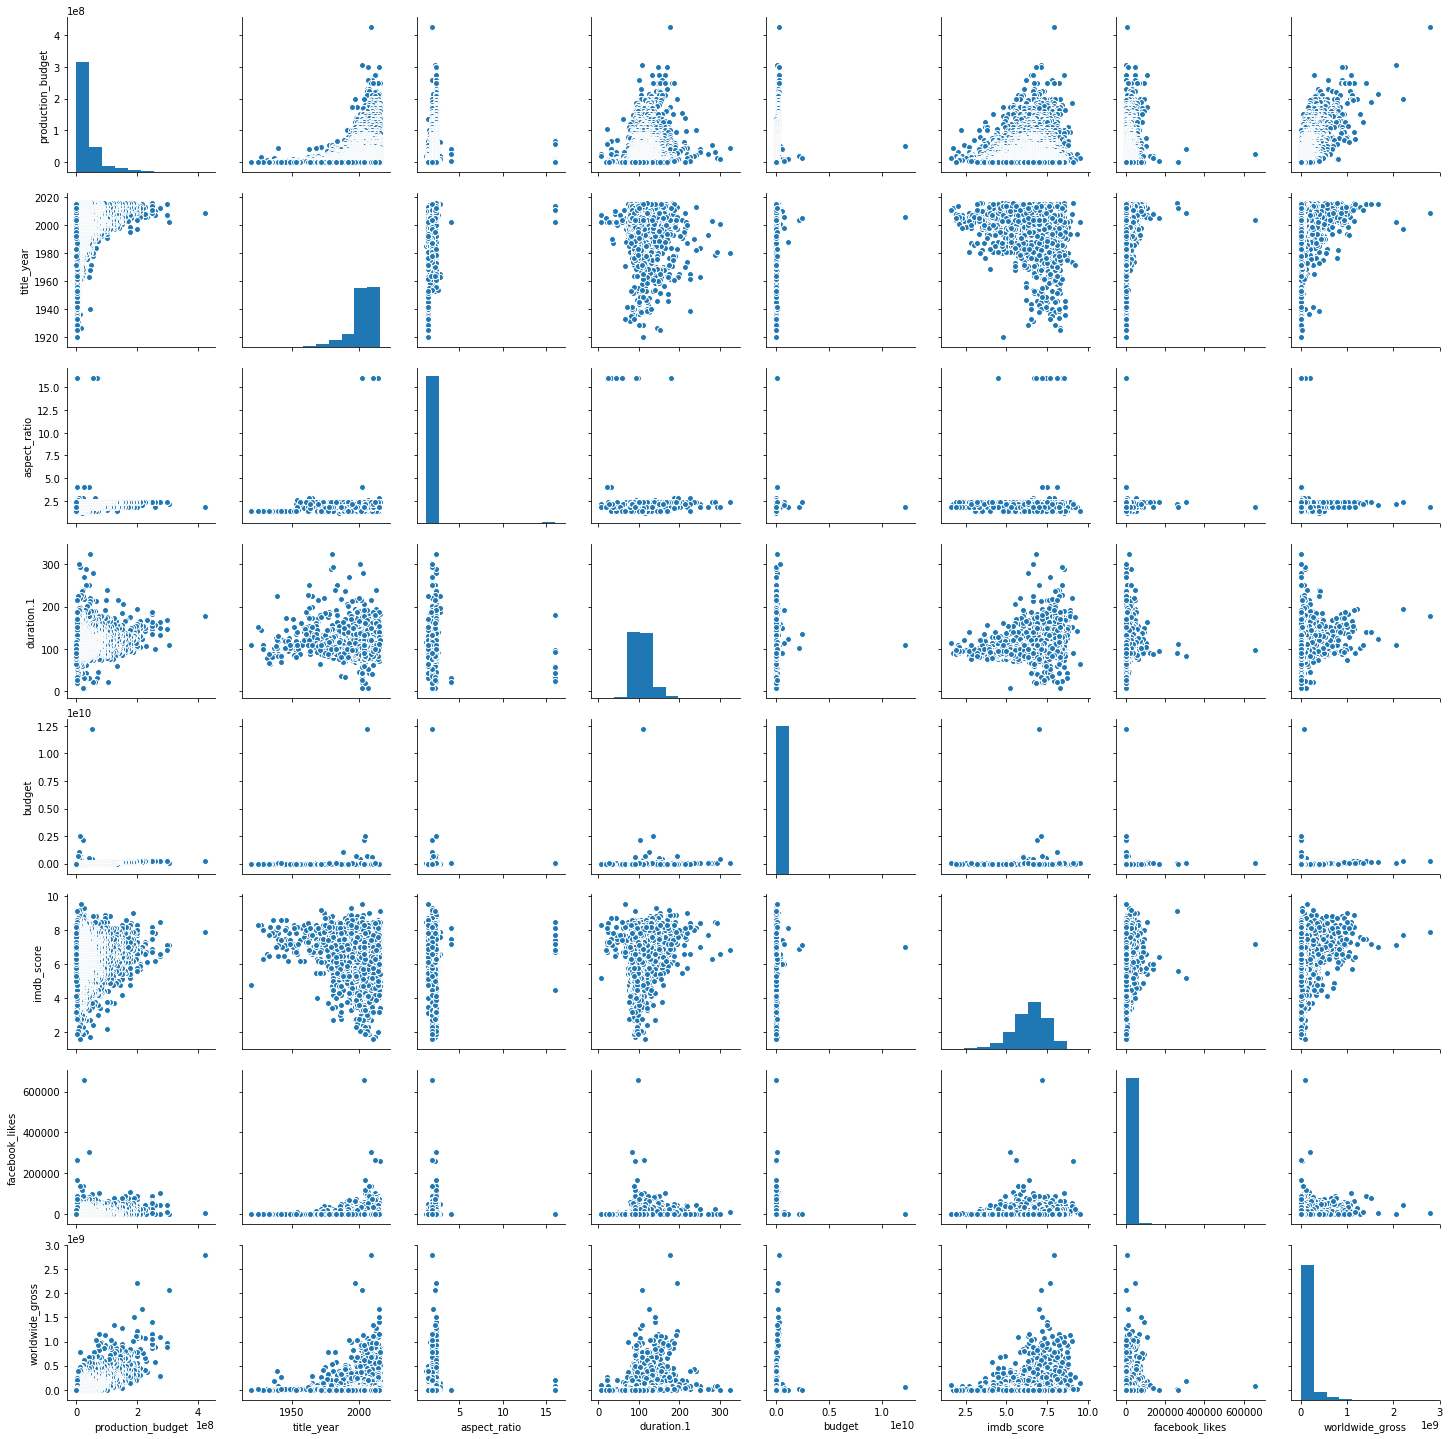

In [72]:
z = pd.concat([X,y], axis = 1)
sns.pairplot(z)

### pd.cut()
- .cat.codes.reanem()

In [78]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
type(clase)

pandas.core.series.Series

In [80]:
z2 = pd.concat([X, clase], axis = 1)
z2.head()

,production_budget,title_year,aspect_ratio,duration.1,budget,imdb_score,facebook_likes,class
0,425000000.0,2009.000000,1.780000,178.000000,2.370000e+08,7.9,4834.0,7
1,306000000.0,2002.130733,2.126976,108.577186,4.045539e+07,7.1,143.0,5
2,300000000.0,2007.000000,2.350000,169.000000,3.000000e+08,7.1,48350.0,5
3,300000000.0,2015.000000,2.350000,148.000000,2.450000e+08,6.8,11700.0,5
4,275000000.0,2012.000000,2.350000,164.000000,2.500000e+08,8.5,106759.0,5


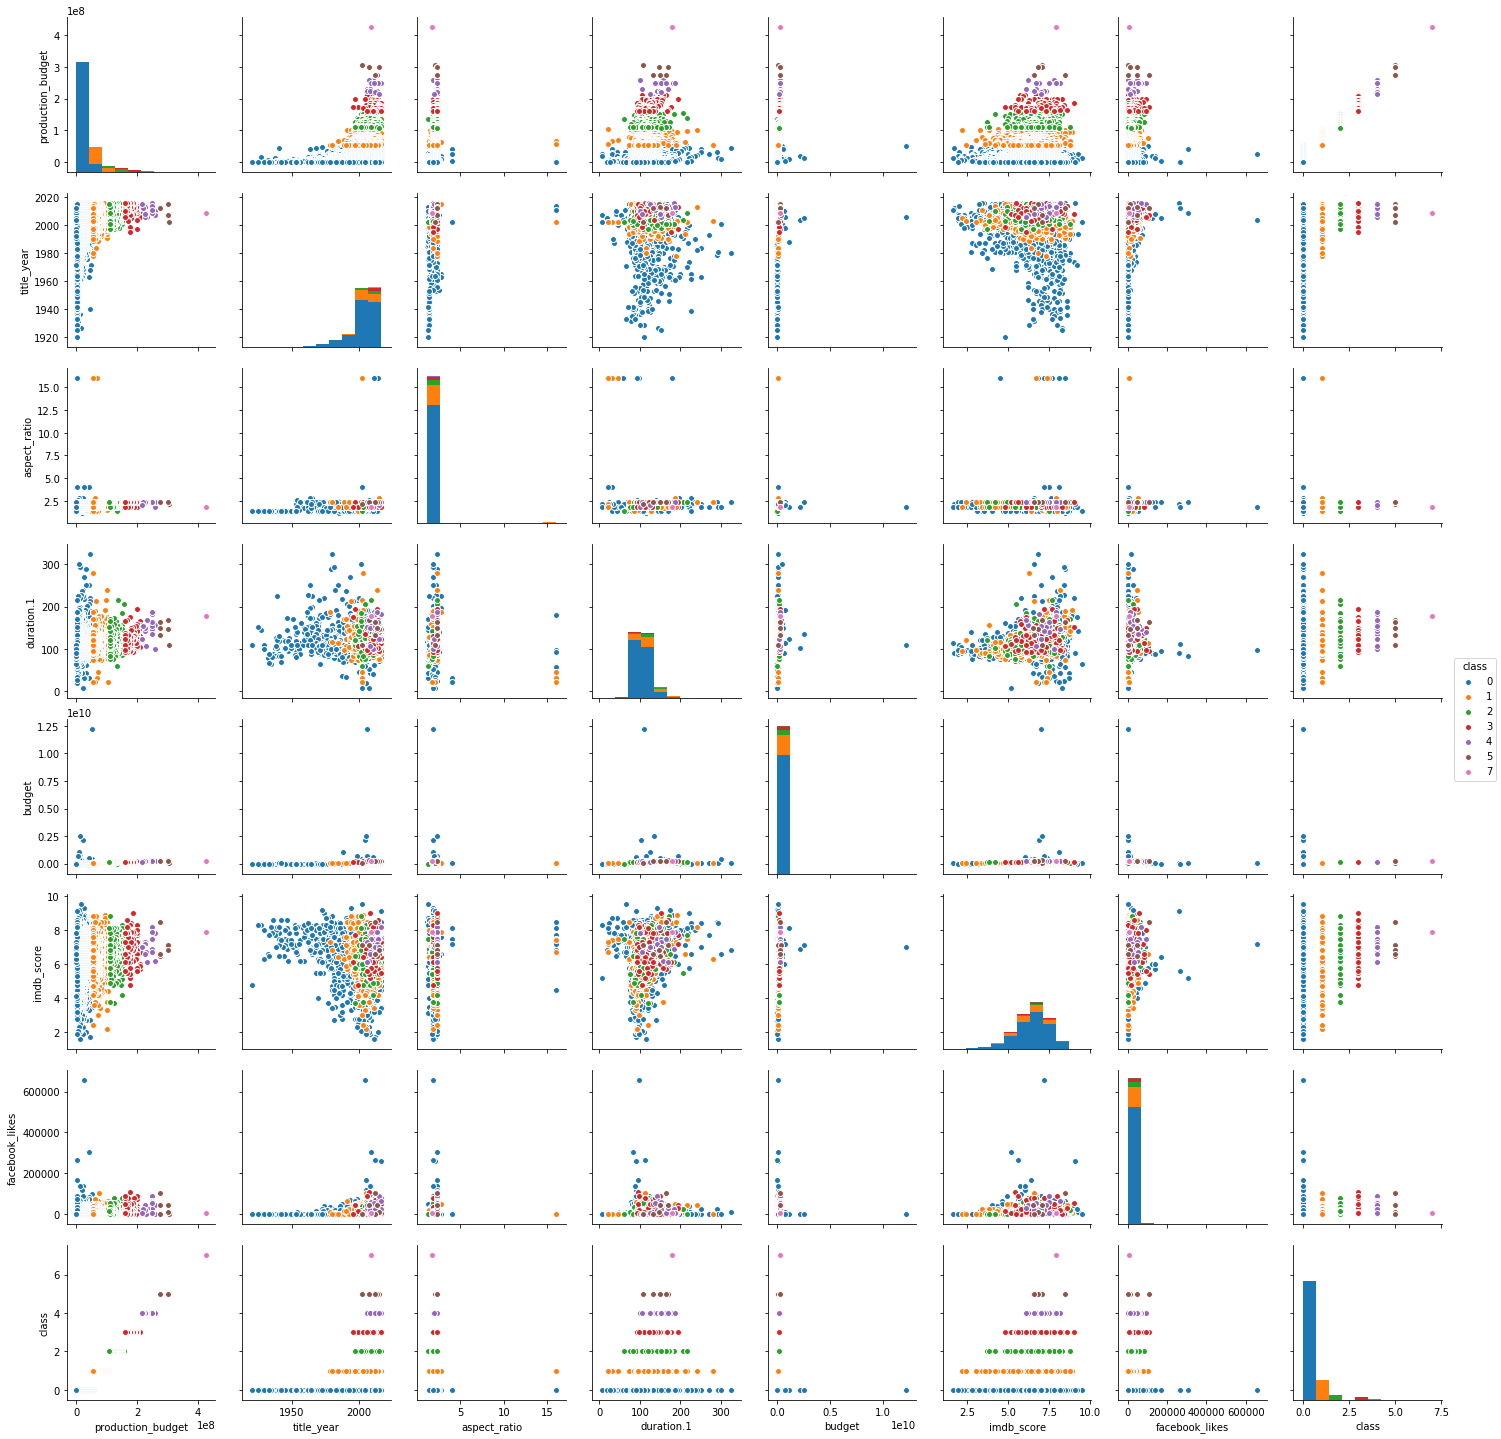

In [81]:
sns.pairplot(z2, hue = 'class')

# Continuando con el análisis exploratorio


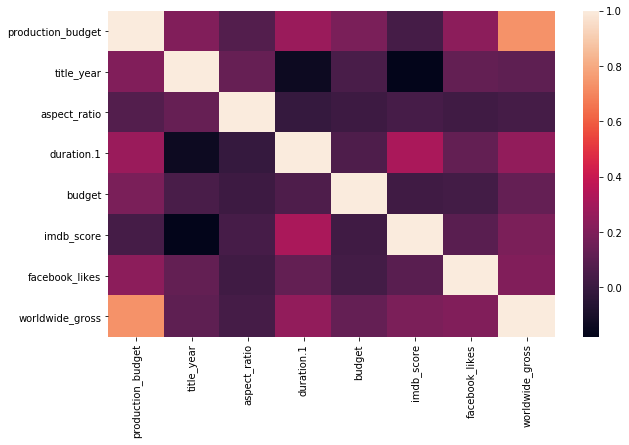

In [82]:
z3 = pd.concat([X, y], axis = 1)
sns.heatmap(z3.corr())

### sklearn.features_selection
- SelectKBest
- mutual_info_regression

In [84]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [85]:
selector = SelectKBest(mutual_info_regression, k = 4)
selector.fit(X,y)

SelectKBest(k=4,
      score_func=<function mutual_info_regression at 0x000001B610CC3D08>)

In [87]:
scores = selector.scores_
scores

array([0.43172727, 0.06355759, 0.07227796, 0.06964706, 0.37645785,
       0.04693389, 0.118199  ])

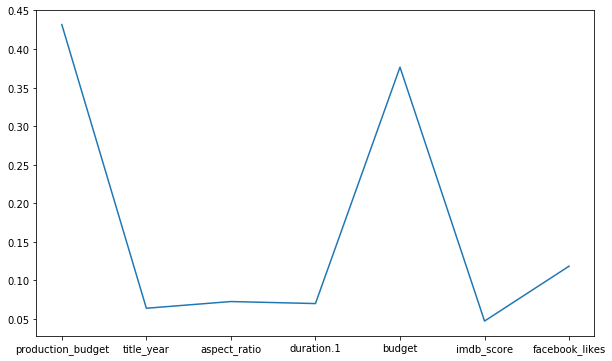

In [89]:
plt.plot(scores)
plt.xticks(np.arange(7), list(X.columns));

In [174]:
X2 = X[['production_budget', 'title_year', 'duration.1', 'facebook_likes', 'imdb_score']]
X3 = X[['production_budget', 'facebook_likes', 'budget']]

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X3,y)
model_X3 = Lasso()
model_X3.fit(X_train, y_train)
model_X3.score(X_test, y_test)

0.5469565886591865

# Creación de features

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [93]:
scaler.mean_

array([3.31937287e+07, 2.00240607e+03, 2.13566176e+00, 1.08560680e+02,
       3.77616896e+07, 6.45367122e+00, 1.01597274e+04])

In [94]:
scaler.scale_

array([4.11888576e+07, 1.16875314e+01, 8.00733201e-01, 2.26172903e+01,
       7.59477650e+07, 1.05927837e+00, 1.98064974e+04])

In [95]:
scaler.transform(X_train)

array([[ 0.77220572,  1.07755282, -0.35675024, ...,  0.16245785,
         0.13814007,  0.09003473],
       [-0.78161257, -0.2058662 , -0.01084707, ..., -0.48403912,
        -2.69397667, -0.39738108],
       [-0.22320912,  0.56418521,  0.26767747, ..., -0.16803246,
        -0.2394755 ,  1.12661376],
       ...,
       [-0.27176594, -2.77270423,  0.26767747, ..., -0.16803246,
        -0.2394755 , -0.4731643 ],
       [-0.32032276, -3.20051057,  0.7797082 , ..., -0.23386718,
         0.13814007, -0.4153045 ],
       [-0.54853982,  0.90643029,  0.26767747, ..., -0.40503746,
        -0.90030274, -0.39828988]])

In [171]:
X_train_scl, X_test_scl = (scaler.transform(X_train), (scaler.transform(X_test)))

In [172]:
model_scale = Lasso()
model_scale.fit(X_train_scl, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [173]:
print(model.score(X_test, y_test))
print(model_scale.score(X_test_scl, y_test))

0.5971546380200907
0.5964140636185122


## Crear nuevas features de forma automática

In [126]:
A = np.arange(6).reshape(3,2)
A

array([[0, 1],
       [2, 3],
       [4, 5]])

### sklearn.preprocessing

In [127]:
from sklearn.preprocessing import PolynomialFeatures

### PolynomialFeatures()
- .fit_transform()

'PolynomialFeatures' transforma una matriz A = (A1,A2) en (1, A1, A2, A1^2, A1*A2, A^2)

In [129]:
transform = PolynomialFeatures()
transform.fit_transform(A)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [130]:
X.shape

(4104, 7)

In [131]:
transform.fit_transform(X).shape

(4104, 36)

In [134]:
transform = PolynomialFeatures(2)
X_poly = transform.fit_transform(X)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y)

In [165]:
model_poly  = Lasso()
model_poly.fit(X_train, y_train)
model_poly.score(X_test, y_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.6381956426919487

# Crear features categoricos

In [194]:
d = pd.DataFrame([['Chile', 'Colombia','Colombia','Venezuela'],['hombre', 'mujer', 'hombre','mujer']])
d

,0,1,2,3
0,Chile,Colombia,Colombia,Venezuela
1,hombre,mujer,hombre,mujer


In [195]:
d = d.T
d

,0,1
0,Chile,hombre
1,Colombia,mujer
2,Colombia,hombre
3,Venezuela,mujer


In [196]:
d.columns = pd.Index(['pais', 'genero'])
d

,pais,genero
0,Chile,hombre
1,Colombia,mujer
2,Colombia,hombre
3,Venezuela,mujer


### pd.get_dummies()

In [197]:
pd.get_dummies(d)

,pais_Chile,pais_Colombia,pais_Venezuela,genero_hombre,genero_mujer
0,1,0,0,1,0
1,0,1,0,0,1
2,0,1,0,1,0
3,0,0,1,0,1


In [199]:
movies_obj = pd.read_csv('/Users/luifer/teaching/machine-learning-platzi-master/datasets/moves_obj.csv')

In [200]:
movies_obj.apply(pd.Series.nunique).sort_values()

color                2
content_rating      18
language            47
country             65
genres             914
actor_1_name      2097
director_name     2398
actor_2_name      3032
actor_3_name      3521
plot_keywords     4760
movie_title       4917
dtype: int64